In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
df_store=pd.read_csv("superstore_marketing_data.csv")

In [298]:
df_store.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [299]:
df_store.shape

(2240, 22)

In [300]:
df_store.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [301]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [302]:
df_store['Dt_Customer']

0        6/16/2014
1        6/15/2014
2        5/13/2014
3         ########
4         ########
           ...    
2235      ########
2236     1/22/2013
2237      ########
2238    11/29/2012
2239      ########
Name: Dt_Customer, Length: 2240, dtype: object

In [303]:
df_store['Dt_Customer']=df_store['Dt_Customer'].replace('########', 0)

In [304]:
df_store['Dt_Customer'].head(10)

0    6/16/2014
1    6/15/2014
2    5/13/2014
3            0
4            0
5    3/17/2014
6    1/29/2014
7    1/18/2014
8            0
9            0
Name: Dt_Customer, dtype: object

In [305]:
df_store.duplicated().sum()

np.int64(0)

In [306]:
df_store['Income'].isna().sum()

np.int64(24)

In [307]:
df_store['Income'] = df_store['Income'].fillna(df_store['Income'].median())

In [308]:
df_store.isna().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [309]:
df_store.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [310]:
int_cols = ['Id', 'Year_Birth', 'Kidhome', 'Teenhome', 
            'Recency', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'Response', 'Complain']

for col in int_cols:
    df_store[col] = df_store[col].astype(int)


In [311]:
numeric_cols = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

def cap_outliers(col):
    Q1 = df_store[col].quantile(0.25)
    Q3 = df_store[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    higher = Q3 + 1.5 * IQR

    df_store[col] = np.where(df_store[col] < lower, lower,
                     np.where(df_store[col] > higher, higher, df_store[col]))

# Apply only on continuous columns
for col in numeric_cols:
    cap_outliers(col)

print("Outliers capped only for continuous columns")


Outliers capped only for continuous columns


array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>],
       [<Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>],
       [<Axes: title={'center': 'MntGoldProds'}>, <Axes: >, <Axes: >]],
      dtype=object)

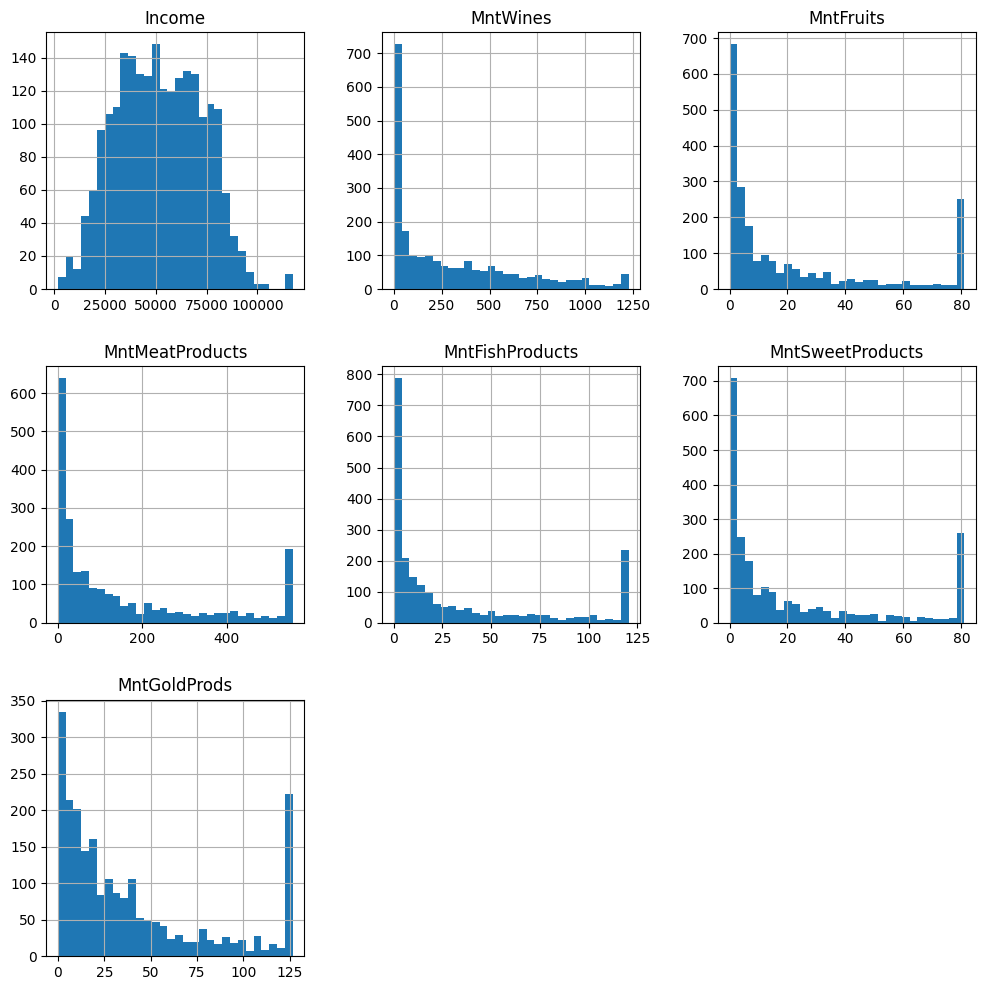

In [312]:
df_store[numeric_cols].hist(figsize=[12,12],bins=30)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Income'),
  Text(1, 0, 'MntWines'),
  Text(2, 0, 'MntFruits'),
  Text(3, 0, 'MntMeatProducts'),
  Text(4, 0, 'MntFishProducts'),
  Text(5, 0, 'MntSweetProducts'),
  Text(6, 0, 'MntGoldProds')])

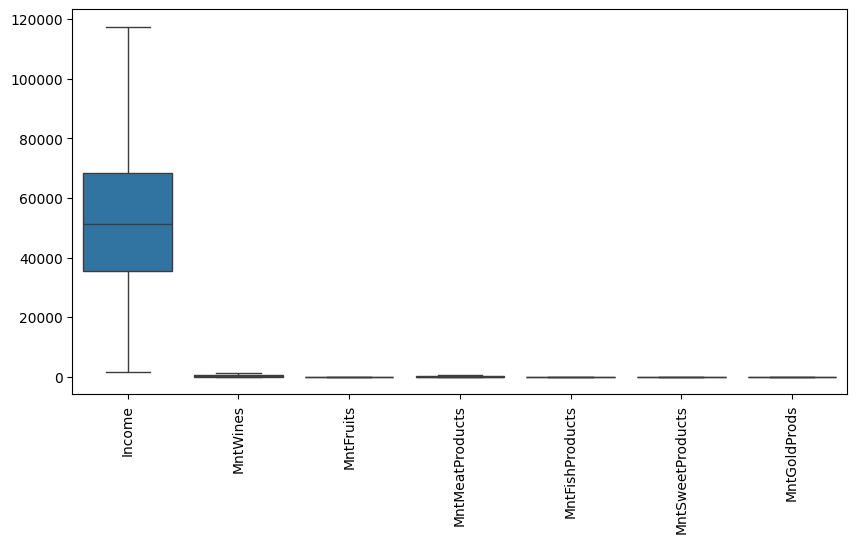

In [313]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df_store[numeric_cols])
plt.xticks(rotation=90)

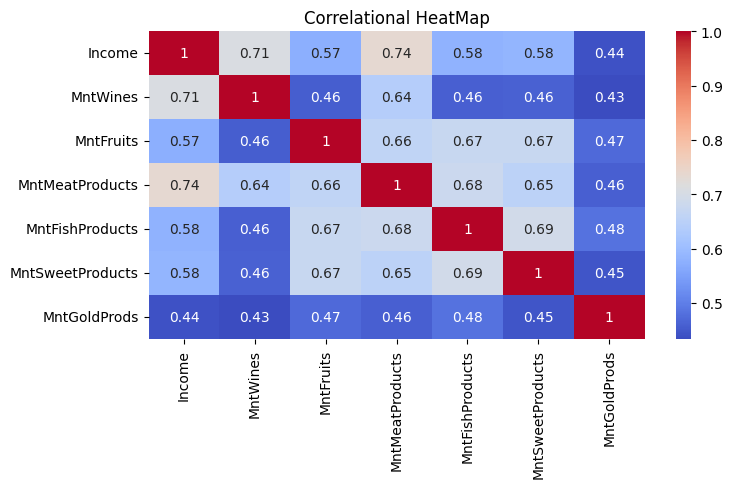

In [314]:
plt.figure(figsize=[8,4])
sns.heatmap(df_store[numeric_cols].corr(), cmap='coolwarm',annot=True)
plt.title("Correlational HeatMap")
plt.show()

In [315]:
df_store['Dt_Customer']=pd.to_datetime(df_store['Dt_Customer'],errors='coerce')

In [316]:
categorical_col=df_store.select_dtypes(include='object').columns
categorical_col

Index(['Education', 'Marital_Status'], dtype='object')

In [317]:
for i in categorical_cols:
    print(f"\ncolumns : {i}")
    print(df_store[i].value_counts())


columns : Education
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

columns : Marital_Status
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


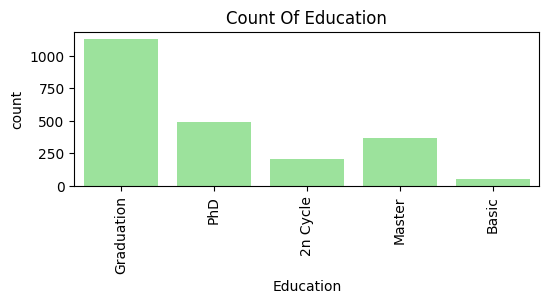

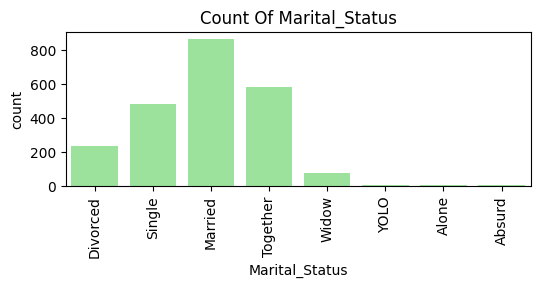

In [318]:
for i in categorical_cols:
    plt.figure(figsize=[6,2])
    sns.countplot(x=df_store[i],color='lightgreen')
    plt.xticks(rotation=90)
    plt.title(f"Count Of {i}")
    plt.show()

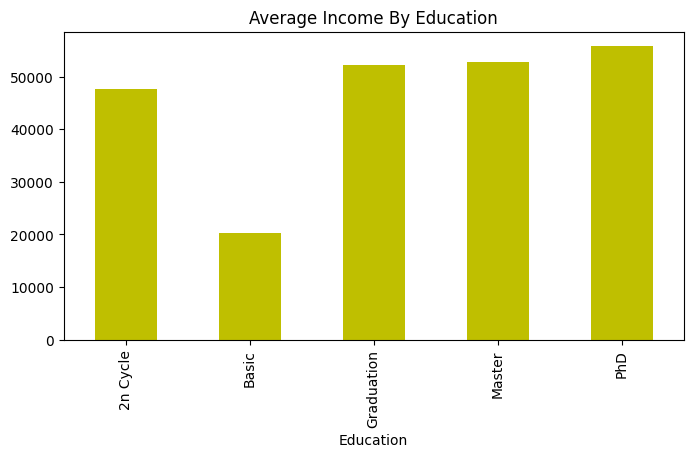

In [319]:
df_store.groupby("Education")["Income"].mean().plot(kind='bar',figsize=[8,4], color='y')
plt.title("Average Income By Education")
plt.show()

In [320]:
df_store['Total_Spend']=df_store[[ 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

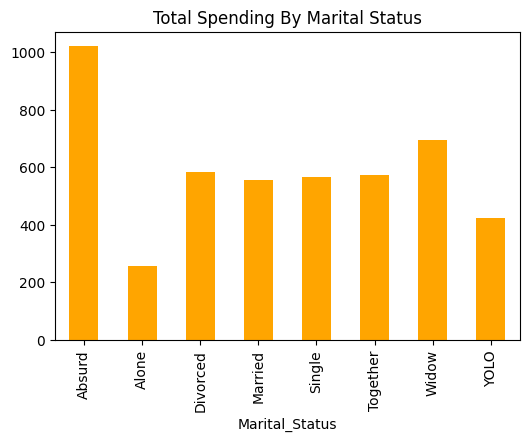

In [321]:
df_store.groupby('Marital_Status')['Total_Spend'].mean().plot(kind='bar',figsize=[6,4],color='orange')
plt.title("Total Spending By Marital Status")
plt.show()

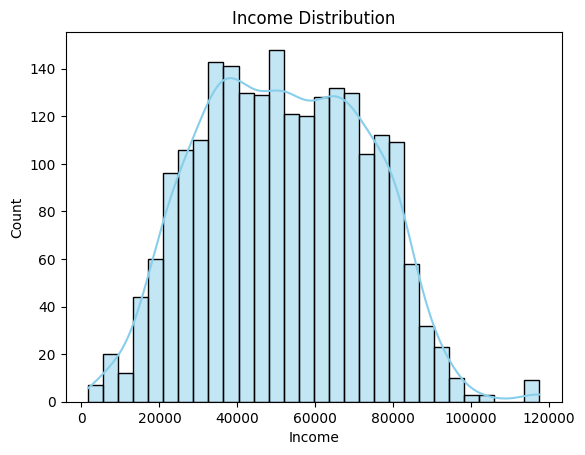

In [322]:
sns.histplot(df_store['Income'], bins=30, color='skyblue',edgecolor='black',kde=True)
plt.title("Income Distribution")
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

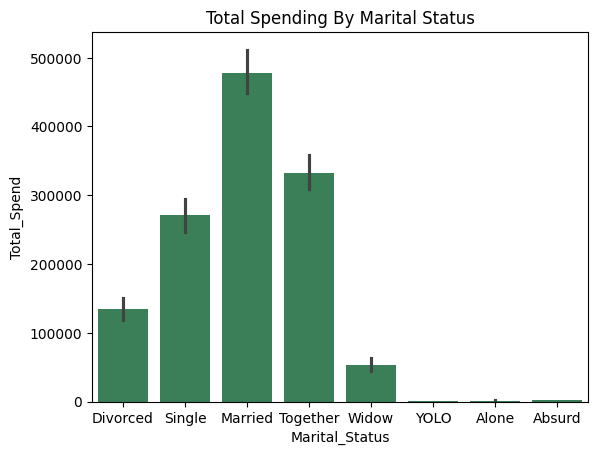

In [323]:
sns.barplot(data=df_store, x='Marital_Status', y='Total_Spend', color='seagreen', estimator='sum')
plt.title("Total Spending By Marital Status")
plt.show()

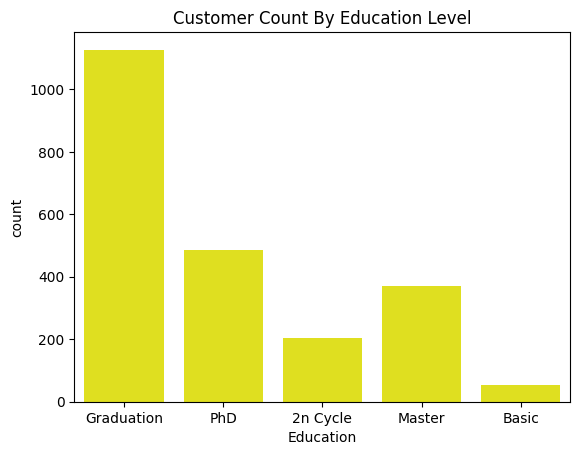

In [324]:
sns.countplot(data=df_store, x='Education', color='yellow')
plt.title("Customer Count By Education Level")
plt.show()

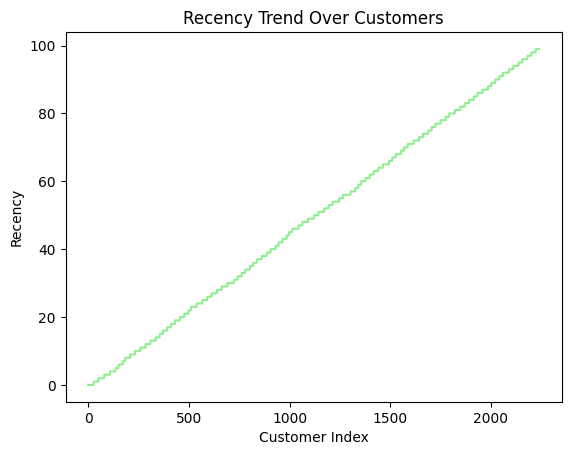

In [325]:
sns.lineplot(data=df_store, x=df_store.index, y='Recency',color='lightgreen')
plt.title("Recency Trend Over Customers")
plt.xlabel("Customer Index")
plt.ylabel("Recency")
plt.show()

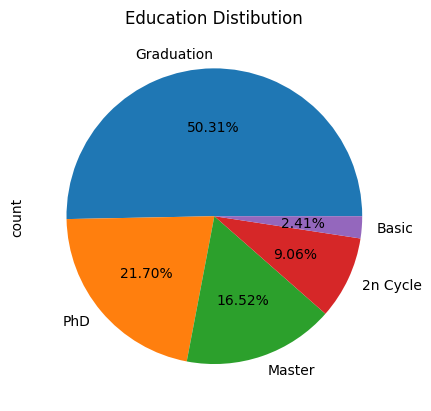

In [326]:
df_store['Education'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Education Distibution')
plt.show()

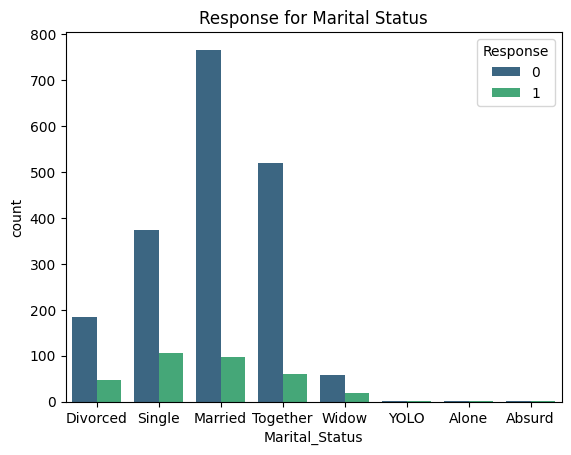

In [327]:
sns.countplot(data=df_store, x='Marital_Status', hue='Response',palette='viridis')
plt.title("Response for Marital Status")
plt.show()

In [328]:
df_store.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Total_Spend'],
      dtype='object')

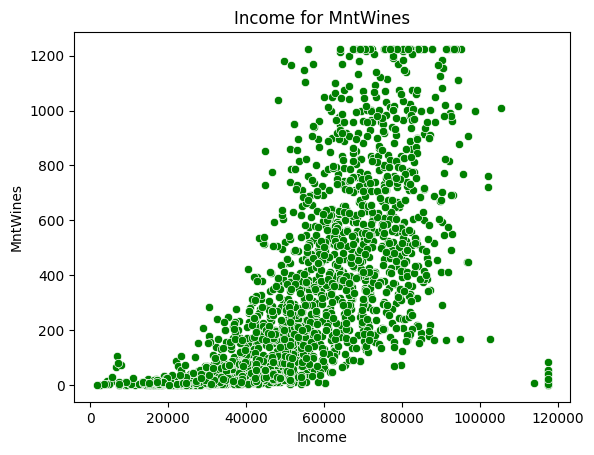

In [329]:
sns.scatterplot(data=df_store, y='MntWines',x='Income',color='g')
plt.title("Income for MntWines")
plt.show()

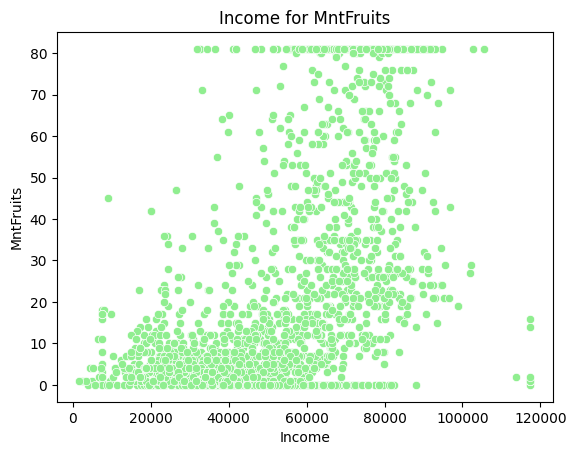

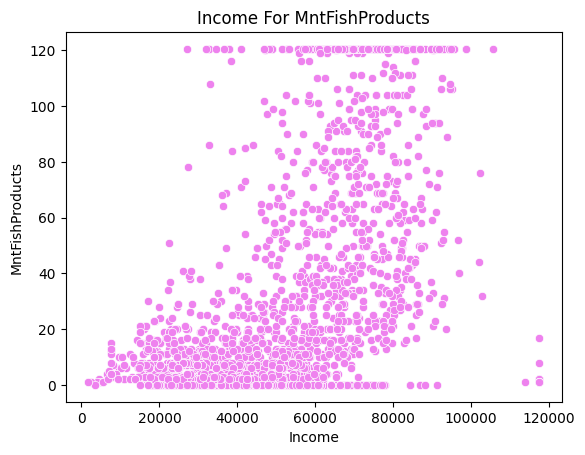

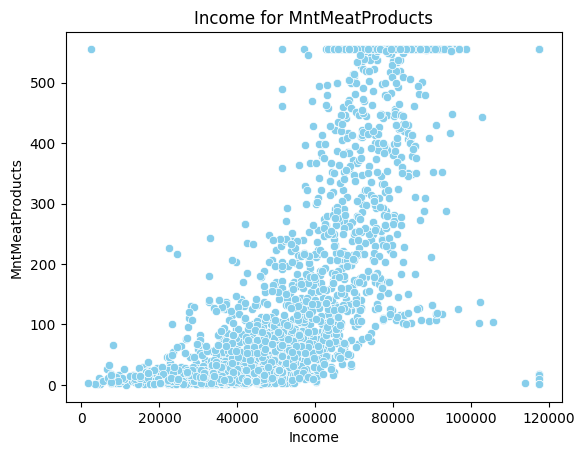

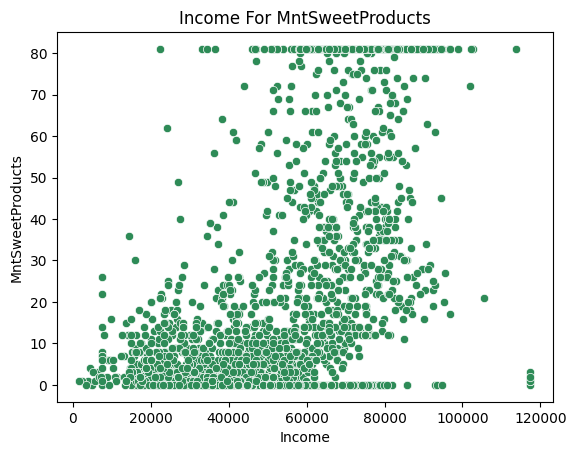

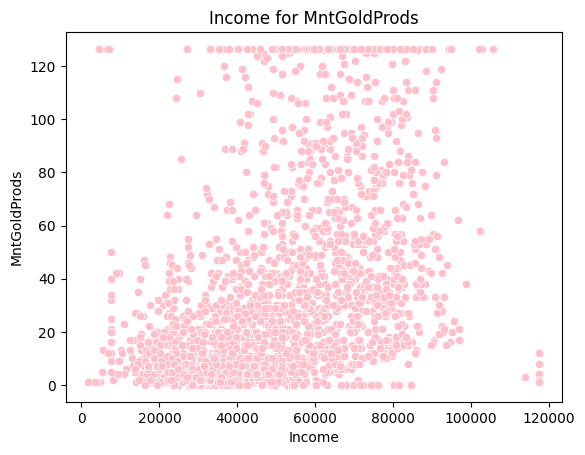

In [330]:
sns.scatterplot(data=df_store, x='Income', y='MntFruits', color='lightgreen')
plt.title("Income for MntFruits")
plt.show()

sns.scatterplot(data=df_store, x='Income', y= 'MntFishProducts', color='violet')
plt.title("Income For MntFishProducts")
plt.show()

sns.scatterplot(data=df_store, x='Income', y='MntMeatProducts', color='skyblue')
plt.title("Income for MntMeatProducts")
plt.show()

sns.scatterplot(data=df_store, x='Income', y='MntSweetProducts', color='seagreen')
plt.title("Income For MntSweetProducts")
plt.show()

sns.scatterplot(data=df_store, x='Income', y='MntGoldProds', color='pink')
plt.title("Income for MntGoldProds")
plt.show()

In [331]:
marital=df_store['Marital_Status'].value_counts()
marital
          

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

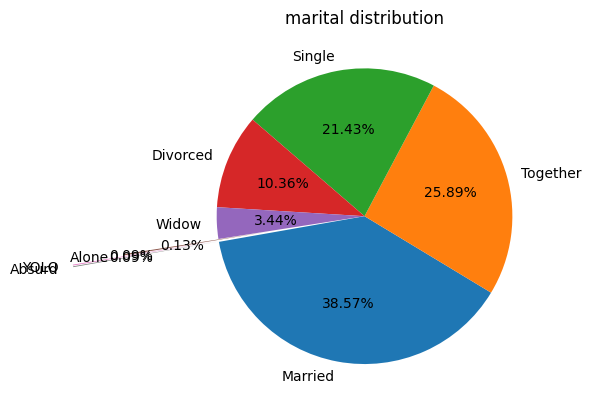

In [275]:
explode = []
for i in marital.index:
    if (i == "YOLO") or (i=="Absurd"):
        explode.append(1)
    elif i=="Alone":
        explode.append(0.65)
    else:
        explode.append(0)

        
plt.pie(marital,labels=marital.index, autopct='%1.2f%%', explode=explode, startangle=190)
plt.title("marital distribution")
plt.show()

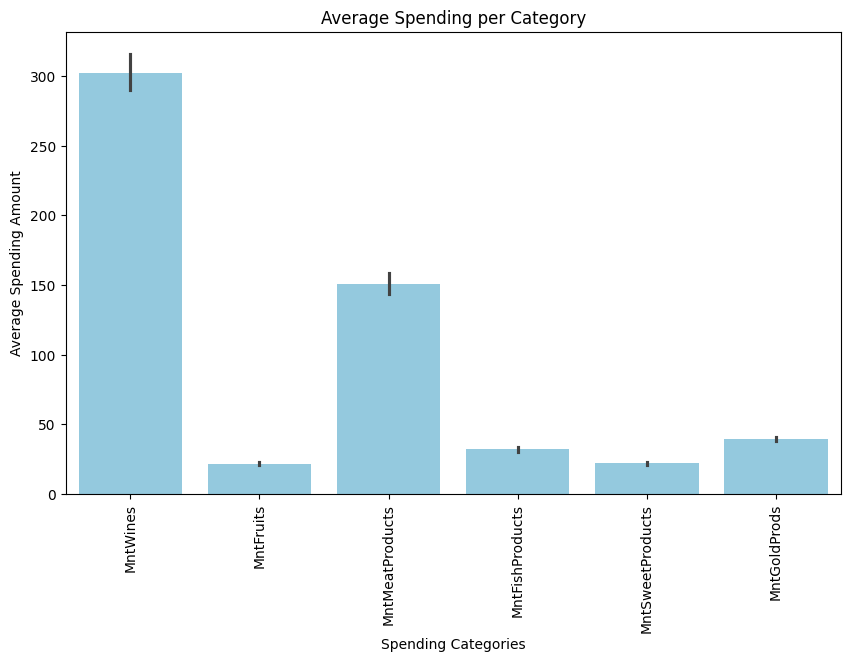

In [337]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Melt the dataframe (convert wide → long)
df_melt = df_store.melt(id_vars='Income', value_vars=cols,
                        var_name='Category', value_name='Spending')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Category', y='Spending', estimator='mean',color='skyblue')

plt.title("Average Spending per Category")
plt.xlabel("Spending Categories")
plt.ylabel("Average Spending Amount")
plt.xticks(rotation=90)
plt.show()

# Insights for supstore Analysis is :-


# Customers Spend the Most on Wine

## Wine has the highest spending amount among all product categories.
## Indicates customers prefer premium alcoholic products.

# Meat Products Are the Second Highest Category

## After wine, customers spend heavily on Meat Products, showing preference for non-vegetarian items.

# Fruits and Sweet Products Have the Lowest Spend

## Fruits & sweet items show minimal spending, suggesting they are not priority items for most customers.

# High Income → Higher Wine + Gold Product Spending

## Customers with higher income tend to buy:

## More Wine

## More Gold Products

 ## Indicates premium product preference by wealthy customers.

# Married & Together Customers Spend More

## People who are Married or Living Together show higher spending overall compared to Single customers.

# Older Customers Spend More on Wines & Meat

## Customers aged between 40–60 spend significantly more on:

### Wine

### Meat

# Gold products

## They contribute the majority of revenue.

# High Web Purchases → High Wine Spending

## Wine buyers tend to buy more through online channels, not stores.

# Store Purchases Are More Common for Daily Products

# Products like:

## Meat

## Sweet products are purchased more through physical stores.